## Stacking - Empilhamento de Algoritmos

O stacking ou empilhamento é uma forma de aprendizado de maquina conjunta. Ele usa um algoritmo de metalearning para aprender a melhor combinar as previsões de duas ou mais **máquinas básicas**. 

O beneficio do empilhamento é que ele pode aproveitar os recursos de uma variedade de modelos de bom desempenho em uma tarefa de classificação ou regressão e fazer previões que podem ter melhor desempenho do que qualquer modelo único no conjunto. 

Stacking é um algoritmo de **aprendizado de máquina conjunto** que aprende a melhor previsões de vários modelos de aprendizado de máquina com bom desempenho.

Como usar conjuntos de empilhamento para modelagem preditiva de regressão e classificação. 



In [ ]:
# compare standalone models for binaey classification 

#analise de dados
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from matplotlib import pyplot


#processamento de dados
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#baseline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#MP definitva
from sklearn.ensemble import StackingClassifier



In [ ]:
# get the datasets

def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models 

#evaluate a given model using cross-validation

def evaluate_model(model, X, y):
    #define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores



>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.824 (0.045)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


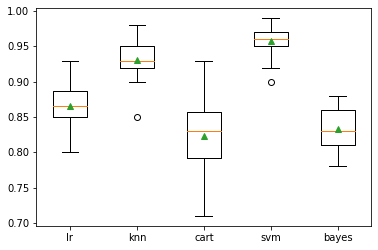

In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

#evaluate the models and store results(
results, names = list(), list()

for name, model in models.items():
    #evaluate the model

    scores = evaluate_model(model, X, y)
    #store the results
    results.append(scores)
    names.append(name)
    #summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores),std(scores)))
    #plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.826 (0.043)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.965 (0.019)


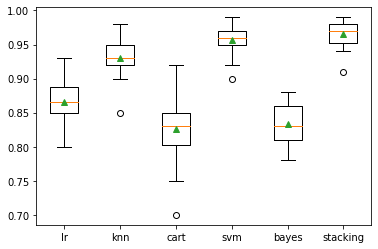

In [ ]:
# get a stacking ensemble of models

def get_stacking():
    
    
    #define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))

    #define meta learner model --> trocar os algoritmos
    level1 = LogisticRegression()
    
    #define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model



    #get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  #define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model and collect the results
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) #posso trocar o scoring tambem 
  return scores 

#define dataset
X, y = get_dataset()
#get the models to evaluate
models = get_models()
#evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    #evaluate the model
    scores = evaluate_model(model, X, y)
    #store the results 
    results.append(scores)
    names.append(name)
    #summarize the perfomance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
#plt model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
#make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
#define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
#define meta learner model
level1 = LogisticRegression()
#define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#fit the model on available data
model.fit(X, y)

#make a prediction for one example 
row = [2.47475454, 0.40165523, 1.68081787, 2.88940715, 0.91704519, -3.07950644, 4.39961206, 0.72464273, -4.86563631, -6.06338084, -1.22209949, -0.4699618, 1.01222748, -0.6899355, -0.53000581, 6.86966784, -3.27211075, -6.59044146, -2.2190585, -3.139579]
yhat = model.predict([row])
#summarize prediction
print('Predict Class: %d' %(yhat))

Predict Class: 0
